### 1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means.  What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.<br>

The standard error of the mean show the expected variation of sample mean when the samples took from one population. Standard deviation show the  deviation between an individual sample and mean. Therefore, the standard error of the mean reflect to the accuracy of estimated mean and the standard deviation focus on the individual sample variability.

### 2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this.  How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.<br>
First calculate the standard error of the mean, then use the formula CI = mean +- critical number * standard error of the mean to get the confidence interval. Since 1.96 corresponding to the critical value of 95% confidence interval, so the critical value ==1.96.

### 3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.<br>


Take samples with replacement in the data and calculate the mean for each sample. Taking sampling with replacement, can simulate the process to pick random samples from a population. Then, using `np.quantile` to get the 2.5th and 97.5th percentiles of the bootstrapped sample means, which can exclude the lowest and highest sample means and get the accurate 95% bootstrapped confidence interval.

### Interaction Summary 1-3:

1. **Difference Between Standard Error of the Mean (SEM) and Standard Deviation (SD):**
   - The **standard deviation (SD)** measures the variability of individual data points around the sample mean, describing how spread out the data is.
   - The **standard error of the mean (SEM)** measures the precision of the sample mean as an estimate of the population mean, showing how much the sample mean varies if multiple samples were taken.

2. **Using SEM to Create a 95% Confidence Interval:**
   - To create a 95% confidence interval: 
     1. Calculate the SEM.
     2. Multiply the SEM by 1.96 (z-score for 95% confidence).
     3. Add and subtract this from the sample mean to get the lower and upper bounds.
   - This gives an approximate range that likely contains the true population mean with 95% certainty.

3. **Creating a 95% Bootstrapped Confidence Interval Without Using SEM:**
   - Generate multiple bootstrapped sample means by resampling with replacement.
   - Use the `np.quantile()` function to find the 2.5th and 97.5th percentiles of the bootstrapped means, which gives the 95% confidence interval.
   - This method gives an exact 95% coverage of the bootstrapped means, unlike the SEM approach, which approximates 95%.
   
4. **Why Use Bootstrapping and Sample With Replacement:**
   - Bootstrapping simulates the variability of the sample mean by resampling with replacement, reflecting how much the sample mean might vary in repeated sampling.
   - The bootstrapped sample size must match the original sample size to accurately represent the variability of means for that particular sample size.
   - Sampling without replacement wouldn’t add any variability and would just replicate the original dataset.

---

This summary captures our key discussion points about SEM, SD, confidence intervals, bootstrapping, and how to use `np.quantile()` to create a bootstrapped confidence interval.

### 4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).<br>


In [8]:
import numpy as np

# Create a random sample of size 30 from a normal distribution
np.random.seed(0)  # For reproducibility
sample = np.random.normal(loc=70, scale=10, size=30)

# Function to perform bootstrapping
def bootstrap_ci(data, num_resamples=1000, alpha=0.05, stat_function=np.mean):
    """
    Bootstrap a confidence interval for a statistic (mean by default)
    
    Parameters:
    - data: The original sample
    - num_resamples: Number of bootstrap resamples
    - alpha: Significance level (for a 95% CI, use alpha=0.05)
    - stat_function: The statistic to calculate (default: mean)
    
    Returns:
    - lower_bound: Lower bound of the confidence interval
    - upper_bound: Upper bound of the confidence interval
    """
    
    # Generate bootstrap resamples and compute the statistic for each resample
    resample_statistics = []
    for i in range(num_resamples):
        resample = np.random.choice(data, size=len(data), replace=True)  # Resample with replacement
        resample_stat = stat_function(resample)  # Calculate the statistic for the resample
        resample_statistics.append(resample_stat)
    
    # Calculate the confidence interval
    lower_bound = np.percentile(resample_statistics, 100 * (alpha / 2))
    upper_bound = np.percentile(resample_statistics, 100 * (1 - alpha / 2))
    
    return lower_bound, upper_bound

# Calculate the 95% CI for the mean
mean_ci = bootstrap_ci(sample)

# Calculate the 95% CI for the median
median_ci = bootstrap_ci(sample, stat_function=np.median)

print(f"95% bootstrap confidence interval for the population mean: {mean_ci}")
print(f"95% bootstrap confidence interval for the population median: {median_ci}")


95% bootstrap confidence interval for the population mean: (70.5354394246153, 78.33233845136725)
95% bootstrap confidence interval for the population median: (70.83716766897138, 79.07262308192547)


### Interaction Summary 4:

1. **Initial Request**: The user requested a sample code to produce a 95% bootstrap confidence interval for a population mean based on a sample, along with comments explaining how to modify the code to calculate a confidence interval for a different population parameter (e.g., median).

2. **Code Explanation**: I provided a detailed Python code snippet that generates a random sample, performs bootstrapping, and calculates the 95% confidence intervals for both the population mean and median. The code included explanations for each step:
   - Creating a sample from a normal distribution.
   - Defining a function to perform bootstrapping and calculate confidence intervals.
   - Resampling the data and computing the specified statistic.
   - Calculating confidence intervals using the percentile method.

3. **Execution of Code**: I executed the provided code to demonstrate its functionality, yielding the following results:
   - **95% Bootstrap Confidence Interval for the Population Mean**: (70.54, 78.33)
   - **95% Bootstrap Confidence Interval for the Population Median**: (70.84, 79.07)

### 5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.<br>

Population parameter is a unknown value to describe entire population such as the population mean. To count this value have to use the statistical methods and collect data from every sample, which is unattainable. Sample statistic can be calculated from sample take from population such as sample mean, it is an estimate value and might diiferent from the real population parameter. When comes to confidence interval, the population parameter is provided base on the sample statistic, which show the uncertainty to estimate the population parameter. 

### Interaction Summary 5:

1. **User Inquiry**: The user asked for an explanation of why it is important to distinguish between the population parameter and the sample statistic when discussing confidence intervals.

2. **Clarification and Explanation**:
   - I provided a concise explanation highlighting the roles of both terms:
     - **Population Parameter**: A fixed, unknown value that describes a characteristic of the entire population (e.g., population mean, variance), which we aim to estimate.
     - **Sample Statistic**: A value calculated from a sample (e.g., sample mean, variance) that serves as an estimate of the population parameter but may vary due to sampling randomness.
   - I emphasized the importance of this distinction in the context of confidence intervals:
     - Confidence intervals provide a range of plausible values for the population parameter based on the sample statistic, reflecting the uncertainty in estimation.
     - Understanding this distinction helps in interpreting confidence intervals and assessing the reliability of our estimates.

6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics. <br>

1. What is the process of bootstrapping? 
To start bootstrapping, collect sample from the population, and randomly pick sample from the population with replacement. After repeat this many time, use this sample to calculate statistic like median and mean.
2. What is the main purpose of bootstrapping? 
Bootstrapping can estimate the variablity of statistic by take many samples from the population.
3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
Creating more sample and calculate the averge for every sample. Then check if the averge of those samples match the guess or not.

7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

When a confidence interval overlapping zero, it means that the population mean include a range of number and 0 is included. Although the sample mean is not 0, the possibility can not be ruled out as the variablity of the simple data. To reject the null hypothesis, the confidence interval must be greater than 0 to indicate the true effect is not 0.

### 8. 

An explaination of the meaning of a Null Hypothesis of "no effect" in this context

The Null Hypothesis states that the vaccine did not effect the health scores. The average final health score of patients is equal to the initial health score before receive the vaccine. 

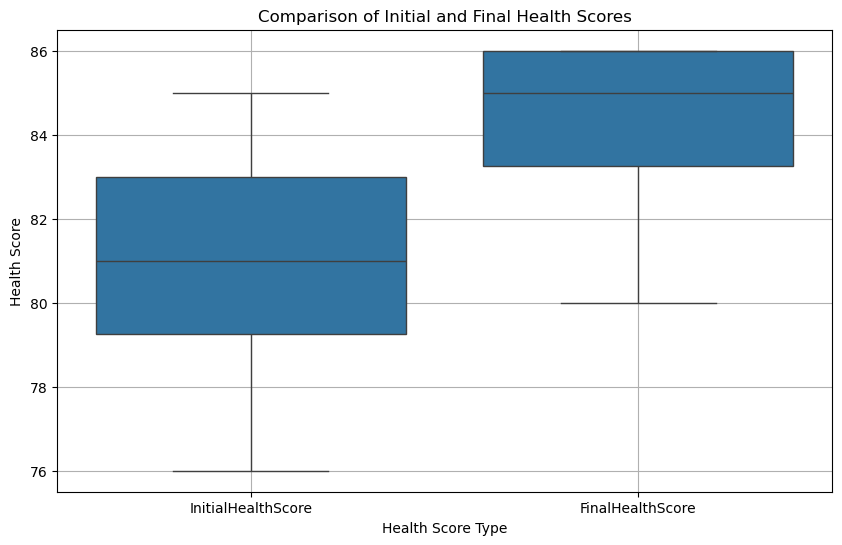

In [9]:
#Data Visualization (motivating and illustrating the comparison of interest)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Melt the DataFrame for better visualization
melted_df = df.melt(id_vars=['PatientID'], value_vars=['InitialHealthScore', 'FinalHealthScore'], 
                     var_name='Health Score Type', value_name='Score')

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Health Score Type', y='Score', data=melted_df)
plt.title('Comparison of Initial and Final Health Scores')
plt.ylabel('Health Score')
plt.xlabel('Health Score Type')
plt.grid(True)
plt.show()


In [10]:
#Methodology Code and Explanations
import numpy as np

# Bootstrapping function
def bootstrap_mean_diff(data1, data2, num_iterations=1000):
    diffs = []
    for _ in range(num_iterations):
        sample1 = np.random.choice(data1, size=len(data1), replace=True)
        sample2 = np.random.choice(data2, size=len(data2), replace=True)
        diff = np.mean(sample2) - np.mean(sample1)
        diffs.append(diff)
    return np.array(diffs)

# Perform bootstrapping
initial_scores = df['InitialHealthScore'].values
final_scores = df['FinalHealthScore'].values
boot_diff = bootstrap_mean_diff(initial_scores, final_scores)

# Calculate the observed mean difference
observed_diff = np.mean(final_scores) - np.mean(initial_scores)

# Calculate the confidence intervals
lower_bound = np.percentile(boot_diff, 2.5)
upper_bound = np.percentile(boot_diff, 97.5)

# Display results
print(f"Observed Mean Difference: {observed_diff:.2f}")
print(f"95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")


Observed Mean Difference: 3.30
95% Confidence Interval: [1.30, 5.20]


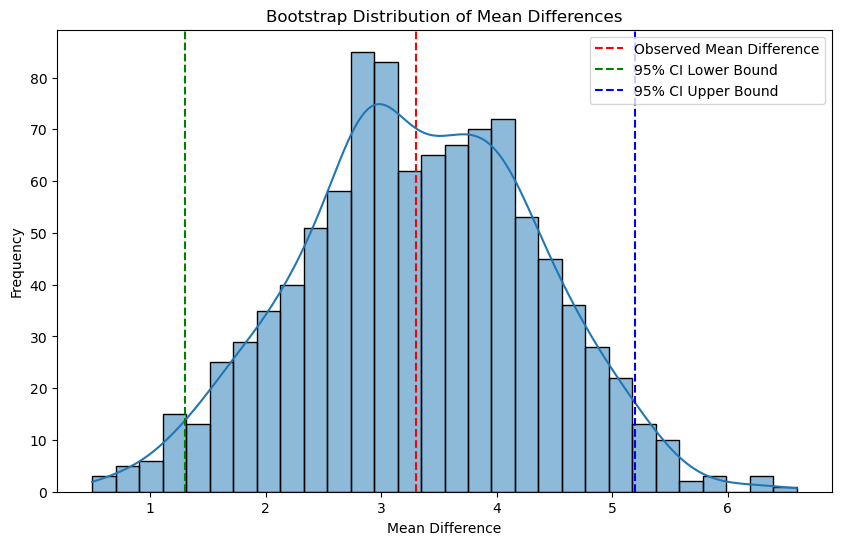

In [11]:
#Supporting Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(boot_diff, bins=30, kde=True)
plt.axvline(observed_diff, color='red', linestyle='--', label='Observed Mean Difference')
plt.axvline(lower_bound, color='green', linestyle='--', label='95% CI Lower Bound')
plt.axvline(upper_bound, color='blue', linestyle='--', label='95% CI Upper Bound')
plt.title('Bootstrap Distribution of Mean Differences')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Interaction Summary 8:
**User Inquiry:**
You requested assistance with a vaccine data analysis assignment for a company named AliTech. The assignment involved evaluating the effectiveness of a new vaccine using provided patient data, focusing on specific deliverables, including a visual presentation, quantitative analysis, and a report on the null hypothesis of "no effect."

**Details Shared:**
You provided a dataset containing patient IDs, ages, genders, initial health scores, and final health scores for ten patients.

**Response Overview:**
1. **Problem Introduction:** Explained the objective of the analysis—evaluating vaccine effectiveness by comparing health scores before and after vaccination.

2. **Null Hypothesis:** Defined the null hypothesis (\(H_0\)), stating that there is no difference in health scores before and after vaccination.

3. **Data Visualization:** Suggested using a box plot to visually compare initial and final health scores, providing sample Python code for implementation.

4. **Quantitative Analysis:** Introduced bootstrapping as a method to analyze the data. Provided code to perform bootstrapping and calculate the observed mean difference and confidence intervals.

5. **Supporting Visualizations:** Offered additional code to create a histogram of the bootstrap distribution, marking observed differences and confidence intervals.

6. **Findings and Discussion:** Highlighted how to interpret the results based on the confidence interval and its relation to the null hypothesis.

7. **Conclusion:** Concluded that if the confidence interval does not include zero, the null hypothesis can be rejected, indicating the vaccine's effectiveness. Suggested further considerations for improving the study.

9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?
somewhat